In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_excel('monthly-sales.xlsx', sheet_name=0, index_col= 'Month')
df


,Monthly Sales
Month,
2008-01,154000
2008-02,96000
2008-03,73000
2008-04,51000
2008-05,53000
...,...
2013-05,231000
2013-06,271000
2013-07,329000


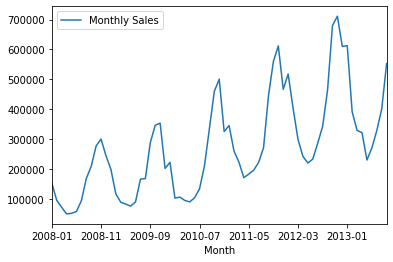

In [8]:
df.plot()

In [9]:
df['Monthly_Sales_pct'] = df['Monthly Sales'].pct_change()


In [10]:
df

,Monthly Sales,Monthly_Sales_pct
Month,,
2008-01,154000,NaN
2008-02,96000,-0.376623
2008-03,73000,-0.239583
2008-04,51000,-0.301370
2008-05,53000,0.039216
...,...,...
2013-05,231000,-0.282609
2013-06,271000,0.173160
2013-07,329000,0.214022


In [14]:
df['Monthly_Sales_pct'].diff()

Month
2008-01         NaN
2008-02         NaN
2008-03    0.137040
2008-04   -0.061787
2008-05    0.340586
             ...   
2013-05   -0.258366
2013-06    0.455769
2013-07    0.040862
2013-08    0.004823
2013-09    0.160207
Name: Monthly_Sales_pct, Length: 69, dtype: float64

In [15]:
df['Monthly_Sales_pct'].autocorr()

0.46440684580089686

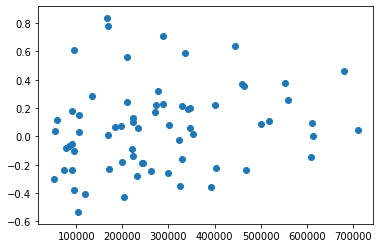

In [16]:
plt.scatter(df['Monthly Sales'], df['Monthly_Sales_pct'])
plt.show()

In [17]:
correlation = df['Monthly Sales'].corr(df['Monthly_Sales_pct'])
print("Correlation is: "
, correlation)

Correlation is:  0.19713027721372767


In [18]:
import statsmodels.api as sm
from scipy import stats

In [19]:
df = sm.add_constant(df)

/home/felipe/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [20]:
df = df.dropna()

In [21]:
results = sm.OLS(df['Monthly Sales'],df[['const','Monthly_Sales_pct']]).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Monthly Sales   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     2.668
Date:                Sun, 17 Nov 2019   Prob (F-statistic):              0.107
Time:                        23:08:58   Log-Likelihood:                -912.37
No. Observations:                  68   AIC:                             1829.
Df Residuals:                      66   BIC:                             1833.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.718e+05   2.04e+0

In [22]:
results.params[0]

271761.13361900474

In [23]:
results.params[1]

108337.11888218974

In [24]:
from statsmodels.graphics.tsaplots import plot_acf

In [26]:
x = df['Monthly Sales']

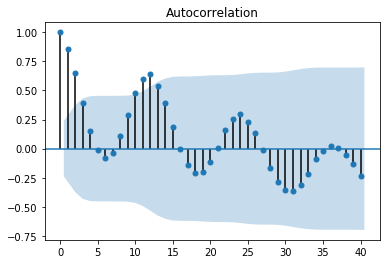

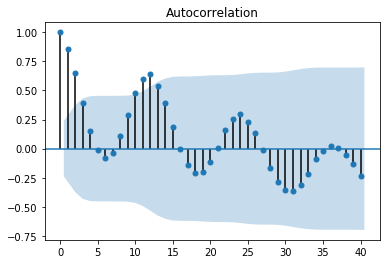

In [28]:
plot_acf(x, lags= 40, alpha=0.05)

In [29]:
from statsmodels.tsa.stattools import acf
print(acf(x))

[ 1.00000000e+00  8.52067115e-01  6.45594614e-01  3.90698092e-01
  1.52259947e-01 -9.36192944e-03 -7.71102277e-02 -3.83996896e-02
  1.12940258e-01  2.84987498e-01  4.76420676e-01  6.01938236e-01
  6.41749932e-01  5.42346735e-01  3.91899285e-01  1.89312629e-01
 -1.63699036e-04 -1.43063682e-01 -2.06215082e-01 -1.97190121e-01
 -1.12238269e-01  4.57983722e-03  1.60991838e-01  2.52436647e-01
  2.99860190e-01  2.32163988e-01  1.36606130e-01 -9.16444131e-03
 -1.62693355e-01 -2.85437596e-01 -3.52890275e-01 -3.66530905e-01
 -3.13797645e-01 -2.17240750e-01 -8.90662646e-02 -1.83301584e-02
  2.47839316e-02  2.19350703e-03 -5.02725111e-02 -1.34027152e-01
 -2.32671049e-01]


/home/felipe/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


In [30]:
noise = np.random.normal(loc=0, scale=1, size=500)

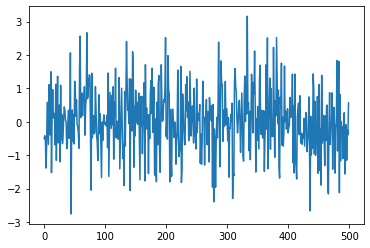

In [32]:
plt.plot(noise)

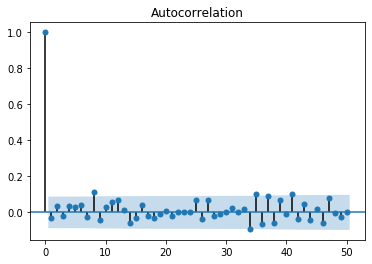

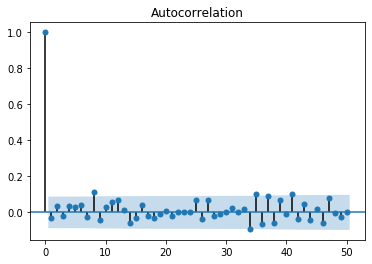

In [33]:
plot_acf(noise, lags=50)

In [34]:
from statsmodels.tsa.stattools import adfuller

In [35]:
adfuller(x)

(1.5999318873175032,
 0.9978573714224485,
 11,
 56,
 {'1%': -3.552928203580539,
  '5%': -2.9147306250000002,
  '10%': -2.595137155612245},
 1368.5243010800664)

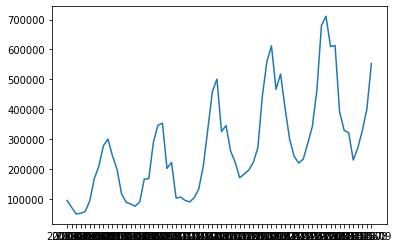

In [41]:
plt.plot(x)

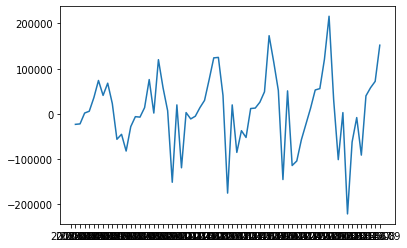

In [48]:
plt.plot(x.diff(1))

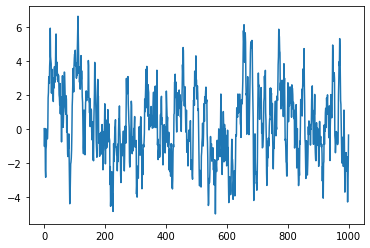

In [49]:
from statsmodels.tsa.arima_process import ArmaProcess
ar = np.array([1, -0.9])
ma = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=1000)
plt.plot(simulated_data)

In [52]:
from statsmodels.tsa.arima_model import ARMA
mod = ARMA(simulated_data, order=(1,0))
result = mod.fit()

In [53]:
print(result.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1445.699
Method:                       css-mle   S.D. of innovations              1.026
Date:                Mon, 18 Nov 2019   AIC                           2897.398
Time:                        00:08:57   BIC                           2912.121
Sample:                             0   HQIC                          2902.994
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3050      0.262      1.163      0.245      -0.209       0.819
ar.L1.y        0.8771      0.015     58.147      0.000       0.848       0.907
                                    Roots           

In [54]:
print(result.params)

[0.3050494 0.8771028]


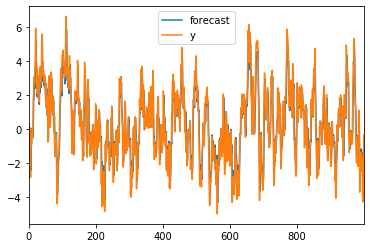

In [56]:
from statsmodels.tsa.arima_model import ARMA
mod = ARMA(simulated_data, order=(1,0))
res = mod.fit()
res.plot_predict()
plt.show()

In [57]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

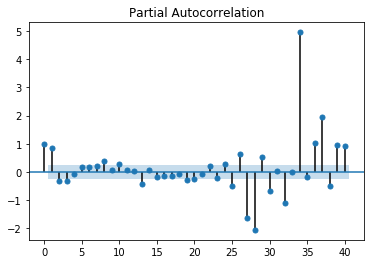

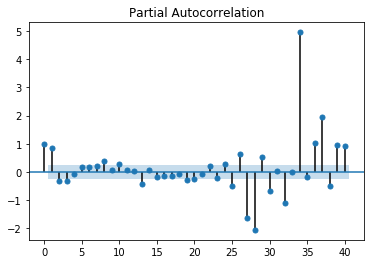

In [59]:
plot_pacf(x, lags= 40, alpha=0.05)


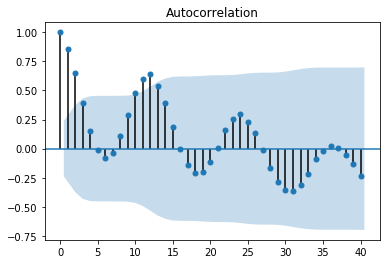

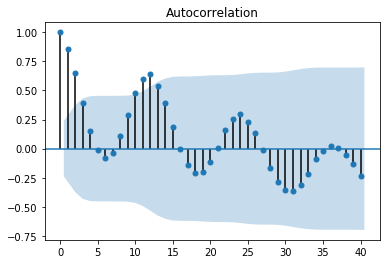

In [60]:
plot_acf(x, lags= 40, alpha=0.05)

In [62]:
result.aic


2897.3980875082493

In [63]:
result.bic

2912.1213533451955

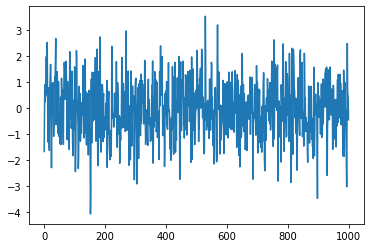

In [64]:
from statsmodels.tsa.arima_process import ArmaProcess
ar = np.array([1])
ma = np.array([1, 0.5])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=1000)
plt.plot(simulated_data)

In [65]:
from statsmodels.tsa.arima_model import ARMA
mod = ARMA(simulated_data, order=(0,1))
result = mod.fit()

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

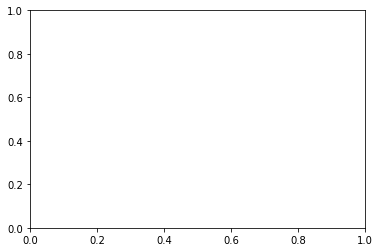

In [66]:
result.plot_predict(start='2016-07-01', end='2017-06-01')
plt.show()

In [67]:
from statsmodels.tsa.stattools import coint
coint(P,Q)

NameError: name 'P' is not defined